In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go



In [3]:
df = pd.DataFrame({'2012': np.random.randn(20),
           '2013': np.random.randn(20)+1})
df['2012'].iloc[0] = np.nan

df = df.reset_index()
dfm = pd.melt(df, id_vars=['index'], value_vars=df.columns[1:])
dfm = dfm.dropna()

dfm.rename(columns={'variable':'year'}, inplace = True)
cols = dfm.year.unique()
nrows = len(cols)



In [7]:
cols

array(['2012', '2013'], dtype=object)

In [8]:
nrows

2

In [4]:
df

,index,2012,2013
0,0,NaN,1.487675
1,1,0.337524,1.207639
2,2,0.159002,0.954573
3,3,0.562356,1.017819
4,4,-0.183614,-0.571206
5,5,0.212105,2.362777
6,6,-0.989357,2.416511
7,7,-0.186337,-0.776521
8,8,0.111809,1.964283
9,9,-0.778536,0.951463


1 2012
Figure({
    'data': [{'autobinx': False,
              'histnorm': 'probability density',
              'legendgroup': 'distplot',
              'marker': {'color': 'rgb(31, 119, 180)'},
              'name': 'distplot',
              'opacity': 0.7,
              'type': 'histogram',
              'x': array([ 1.30510474,  1.0375969 ,  0.06679589,  1.01825295,  0.45381859,
                          -1.19356818, -0.39708534, -0.84771246, -0.7443595 ,  1.9677328 ,
                          -1.4672101 , -0.44878991, -0.82635934,  0.92194094, -0.25988987,
                          -1.23899858, -0.8020481 , -1.4524011 , -1.18684523]),
              'xaxis': 'x',
              'xbins': {'end': 1.967732797613872, 'size': 1.0, 'start': -1.467210098445344},
              'yaxis': 'y'},
             {'legendgroup': 'distplot',
              'marker': {'color': 'rgb(31, 119, 180)'},
              'mode': 'lines',
              'name': 'distplot',
              'showlegend': False,
      

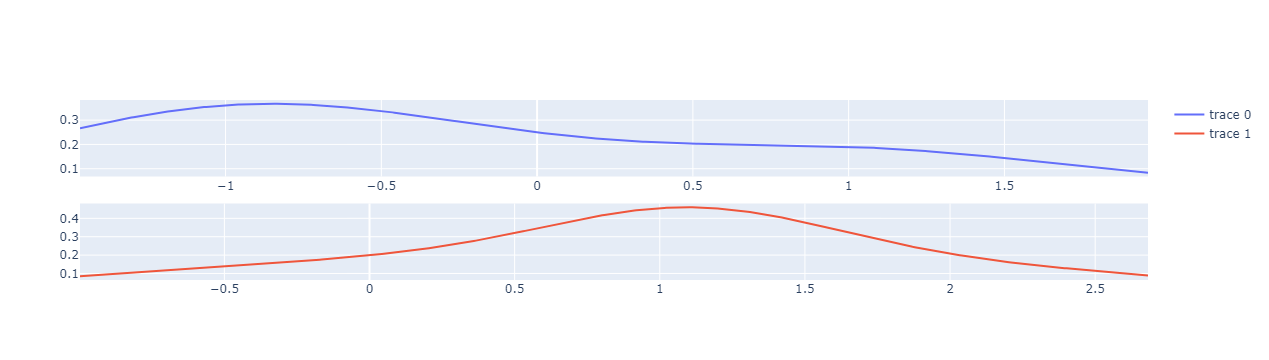

In [13]:
fig = make_subplots(rows=nrows, cols=1)

for r, col in enumerate(cols, 1):
    print(r, col)
    dfs = dfm[dfm['year']==col]
    #print(dfs)
    fx1 = ff.create_distplot([dfs['value'].values], ['distplot'],curve_type='kde')
    print(fx1)
    fig.add_trace(go.Scatter(
                                x= fx1.data[1]['x'],
                                y =fx1.data[1]['y'],
                              ), row = r, col = 1)

fig.show()

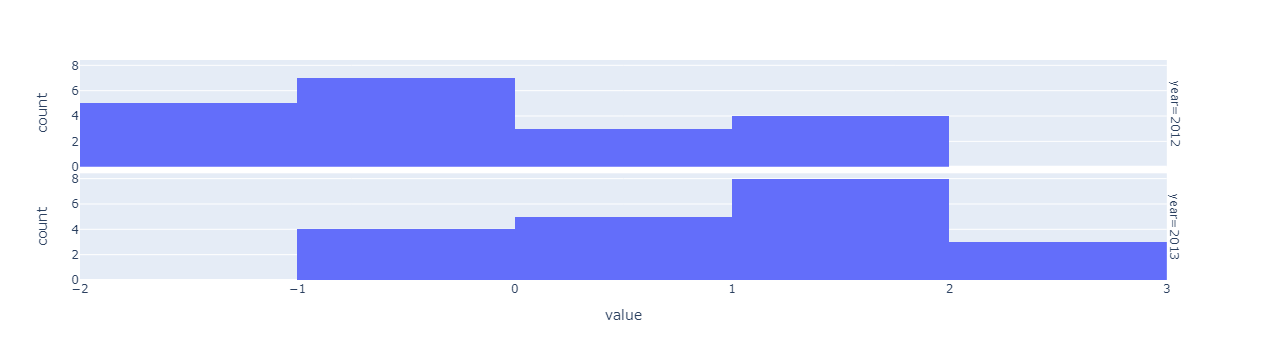

In [12]:
import numpy as np
import pandas as pd
import plotly.express as px

df = pd.DataFrame({'2012': np.random.randn(20),
           '2013': np.random.randn(20)+1})
df['2012'].iloc[0] = np.nan

df = df.reset_index()
dfm = pd.melt(df, id_vars=['index'], value_vars=df.columns[1:])
dfm = dfm.dropna()

dfm.rename(columns={'variable':'year'}, inplace = True)
fig = px.histogram(dfm, x="value",
                   facet_row = 'year')
fig.show()